<a href="https://colab.research.google.com/github/yohanesnuwara/volve-machine-learning/blob/main/notebook/volve_seismic_attribute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yohanesnuwara/computational-geophysics

Cloning into 'computational-geophysics'...
remote: Enumerating objects: 434, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 434 (delta 125), reused 0 (delta 0), pack-reused 237
Receiving objects: 100% (434/434), 35.23 MiB | 28.38 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/content/computational-geophysics/seismic")
from seistool import *
from seis_attribute import *

!pip install -q segyio
import segyio

     |████████████████████████████████| 92kB 7.4MB/s 


In [3]:
!git clone https://github.com/yohanesnuwara/d2geo

import sys
sys.path.append('/content/d2geo/attributes')

Cloning into 'd2geo'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 112 (delta 26), reused 14 (delta 0), pack-reused 52
Receiving objects: 100% (112/112), 52.57 KiB | 13.14 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive') # yohannesnuwara@gmail.com

Mounted at /content/drive


In [5]:
volve = '/content/drive/My Drive/Volve Dataset/ST0202R08_PZ_PSDM_FULL_OFFSET_DEPTH.MIG_FIN.POST_STACK.3D.JS-017534.segy'

cube = openSegy3D(filename=volve)

Successfully read 

Inline range from 9985 to 10369
Crossline range from 1932 to 2536
TWT from 0.0 to 4500.0
Sample rate: 5.0 ms
Survey rotation: 4.96 deg


In [6]:
# The output is a dictionary
cube

{'crosslines': array([1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
        1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
        1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
        1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
        1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
        1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
        1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
        2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
        2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
        2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052,
        2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063,
        2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074,
        2075, 2076, 2077

In [7]:
# Access the data and properties of output by ".attribute"
# The attributes are: .data, .inlines, .crosslines, .twt, .sample_rate
# Example 1: Access the inlines
print(cube.inlines)

# Example 2: Access the data
print(cube.data)

[ 9985  9986  9987  9988  9989  9990  9991  9992  9993  9994  9995  9996
  9997  9998  9999 10000 10001 10002 10003 10004 10005 10006 10007 10008
 10009 10010 10011 10012 10013 10014 10015 10016 10017 10018 10019 10020
 10021 10022 10023 10024 10025 10026 10027 10028 10029 10030 10031 10032
 10033 10034 10035 10036 10037 10038 10039 10040 10041 10042 10043 10044
 10045 10046 10047 10048 10049 10050 10051 10052 10053 10054 10055 10056
 10057 10058 10059 10060 10061 10062 10063 10064 10065 10066 10067 10068
 10069 10070 10071 10072 10073 10074 10075 10076 10077 10078 10079 10080
 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092
 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104
 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116
 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128
 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140
 10141 10142 10143 10144 10145 10146 10147 10148 10

In [8]:
sliceViewer(cube, cube_name="Volve")

interactive(children=(ToggleButtons(description='Selection', options=('Inline', 'Crossline', 'Timeslice'), val…

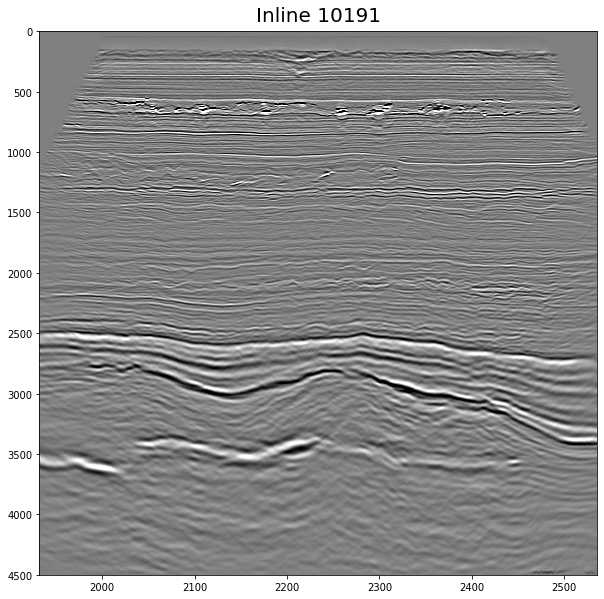

In [9]:
# Slicing data
inline_loc = 10191
data = cube.data
xlines, inlines, twt = cube.crosslines, cube.inlines, cube.twt

data_slice = data[inline_loc-inlines[0],:,:]

plt.figure(figsize=(10,10))
plt.imshow(data_slice.T, aspect='auto', vmin=-0.1, vmax=0.1, cmap='gray',
           extent=(xlines[0], xlines[-1], 4500, 0))
plt.title('Inline {}'.format(inline_loc), size=20, pad=10)

plt.show()

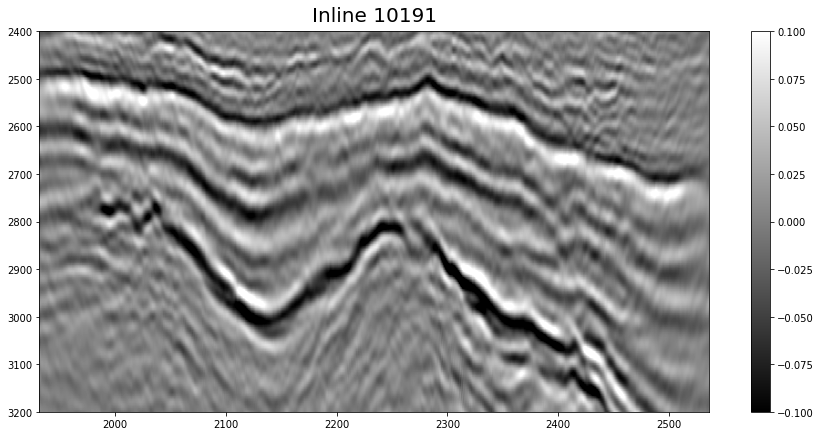

In [10]:
# Slicing data
inline_loc = 10191
data = cube.data
xlines, inlines, twt = cube.crosslines, cube.inlines, cube.twt

data_slice = data[inline_loc-inlines[0],:,:]

plt.figure(figsize=(15,7))
plt.imshow(data_slice.T, aspect='auto', vmin=-0.1, vmax=0.1, cmap='gray',
           extent=(xlines[0], xlines[-1], 4500, 0))
plt.title('Inline {}'.format(inline_loc), size=20, pad=10)
plt.ylim(3200, 2400)

plt.colorbar()
plt.show()

## Attribute calculation

In [11]:
result = compute_attribute(cube=data, output='2d', type='il', inline_loc=10191, 
                      inline_array=inlines, kernel=(10,2,1),
                      attribute_class='CompleTrace', attribute_type='enve')
result

dask.array<_trim, shape=(1, 905, 625), dtype=float32, chunksize=(1, 582, 605), chunktype=numpy.ndarray>

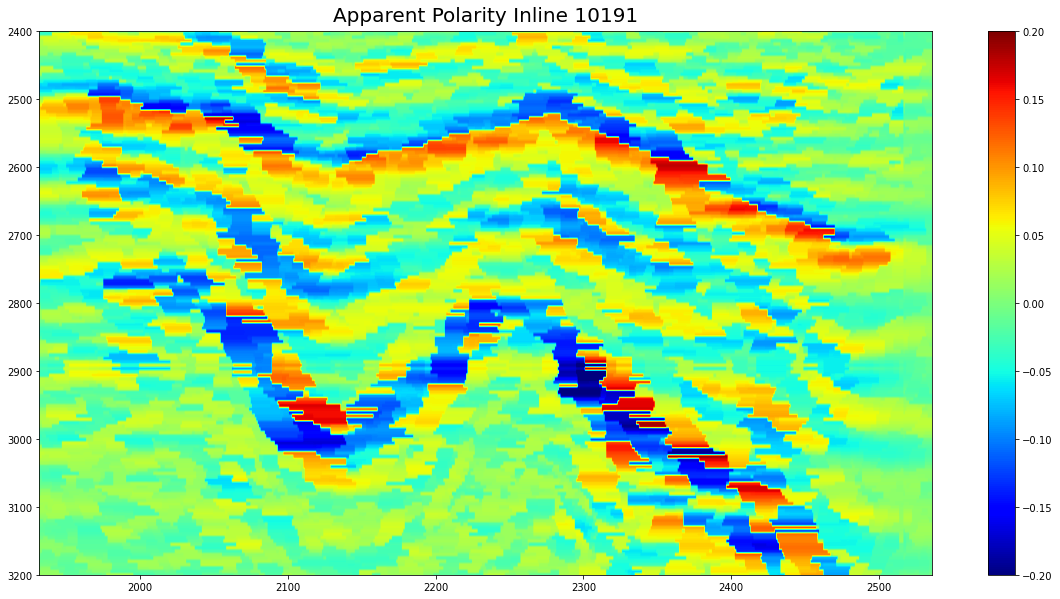

In [13]:
# Calculate attribute
result = compute_attribute(cube=data, output='2d', type='il', inline_loc=10191, 
                      inline_array=inlines, kernel=(10,2,1),
                      attribute_class='CompleTrace', attribute_type='apolar')

# Plot attribute section
plt.figure(figsize=(20,10))

vmin, vmax = -0.2, 0.2
# vmin, vmax = None, None
display_attribute(result, 'il', xlines, twt, 'jet', vmin, vmax)
plt.title('Apparent Polarity Inline {}'.format(inline_loc), size=20, pad=10)
plt.ylim(3200, 2400)

plt.show()

## Various attributes for clustering dataset preparation

In [22]:
atts = ['inphase', 'enve', 'infreq', 'resfreq', 'apolar']

all_atts = []
for i in range(5):
  # Calculate attribute
  result = compute_attribute(cube=data, output='2d', type='il', inline_loc=10191, 
                        inline_array=inlines, kernel=(10,2,1),
                        attribute_class='CompleTrace', attribute_type=atts[i])
  all_atts.append(result.compute().reshape(-1))

inphase, enve, infreq, resfreq, apolar = all_atts

In [35]:
np.savetxt('five_attributes.txt', np.transpose(all_atts), fmt='%2f')

In [38]:
np.loadtxt('/content/five_attributes.txt')

array([[  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       ...,
       [  0.      ,   0.      ,   0.      , 531.248938,   0.      ],
       [  0.      ,   0.      ,   0.      , 531.248938,   0.      ],
       [  0.      ,   0.      ,   0.      , 531.248938,   0.      ]])